<a href="https://colab.research.google.com/github/jmgang/SpoTwoFy-project-notebooks/blob/main/notebooks/5a_D7N2_Create_Recommender_Engine_NonML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Recommender Engine

*What is a recommender engine?*

A recommender engine is an information filtering system that predicts a user's preferences for a set of items (such as products, movies, or music) based on their previous interactions with those items or similar items, and provides personalized recommendations for new items.

This recommender engine takes in a *seed track* and outputs track recommendations based on *similarity measures*

In [25]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

## 1. Read the recommendation pool

In [28]:
# read data
rec_pool_df = pd.read_csv("https://raw.githubusercontent.com/jmgang/SpoTwoFy-project-notebooks/main/data/recommender/spotify_tracks_hale_no_ml_rec_pool.csv")
rec_pool_df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,duration_ms,artist_id,artist_name,num_artists,album_id,release_date,playlist_id,playlist_name,duration_mins,genre
0,2SrC3eKJkbnz4WWJufgBTS,0.488,0.870,6,-4.185,0,0.0421,0.003530,0.000000,0.4840,...,187520,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,1,4qzWf7EmJKU7SHpf38zFX0,2022-10-21,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.125333,alternative_rock
1,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,...,216880,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,1,6hPkbAV3ZXpGZBGUvL6jVM,2000-10-24,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.614667,alternative_rock
2,6b2oQwSGFkzsMtQruIWm2p,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,...,238640,4Z8W4fKeB5YxbusRsdQVPb,Radiohead,1,6400dnyeDyD2mIFHfkwHXN,1993-02-22,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.977333,alternative_rock
3,6gVH9jHl5Xpxxl4gVVrEkE,0.410,0.964,7,-6.648,1,0.0763,0.000706,0.745000,1.0000,...,285186,6olE6TJLqED3rqDCT0FyPh,Nirvana,1,01Z1nufhjxJVXVDuMRmNEM,2009-01-01,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,4.753100,alternative_rock
4,7AK0yeohL3m0N6l7GgzJhE,0.547,0.958,9,-2.448,0,0.1210,0.003500,0.000008,0.1320,...,193100,0avNS76kgqKRDQZWMTpQey,Hurricane on Saturn,1,76Ou6hEBhZnDymZGVIrHOD,2023-04-18,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.218333,alternative_rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10300,3jkQ8gbcJlHq7Q91qOzesP,0.637,0.582,9,-5.508,1,0.0441,0.249000,0.000000,0.1140,...,251668,4NeCu267LZemnoq44lZYKy,Julie Anne San Jose,1,09t5M2YujQwtojduKKF1af,2014-06-01,4boANFO6yU6l17CaH54KgZ,Sad opm,4.194467,sad_opm
10301,0XH7GNdyPtlGtBzoklmxya,0.252,0.270,2,-10.128,1,0.0329,0.890000,0.001530,0.0714,...,237880,6aiCKnIN68hohzU3ZzNq48,Sarah Geronimo,1,1UAwPyLNLgyYbyEQVbRDto,2012,4boANFO6yU6l17CaH54KgZ,Sad opm,3.964667,sad_opm
10302,11GoPGhmYjujISxHGVDLW5,0.195,0.397,9,-7.096,1,0.0304,0.897000,0.000014,0.2230,...,252314,2vTbuBRo7ACOZ3JsCnaL7S,Kyla,1,7gsdzKleg7iNM0WzoSzEh1,2016-09-01,4boANFO6yU6l17CaH54KgZ,Sad opm,4.205233,sad_opm
10303,49IGRAjikypmzrZbsO0AY7,0.496,0.399,2,-7.802,1,0.0293,0.253000,0.000002,0.0782,...,266906,7LVPSD4kabI5LiXIVPI8tn,Jona,1,2PqXW34KfNMr393bhECvcd,2017-02-27,4boANFO6yU6l17CaH54KgZ,Sad opm,4.448433,sad_opm


In [29]:
rec_pool_df.shape

(10305, 24)

In [30]:
rec_pool_df.track_name[:5]

0                                              Numb
1                                        In the End
2                                             Creep
3    Smells Like Teen Spirit - 1992/Live at Reading
4                                            I Want
Name: track_name, dtype: object

In [31]:
rec_pool_df.keys()

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_name', 'popularity', 'duration_ms',
       'artist_id', 'artist_name', 'num_artists', 'album_id', 'release_date',
       'playlist_id', 'playlist_name', 'duration_mins', 'genre'],
      dtype='object')

In [34]:
hale_songs_df = pd.read_csv('https://raw.githubusercontent.com/jmgang/SpoTwoFy-project-notebooks/main/data/hale/hale_songs.csv')
hale_songs_df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_name,album_id,album_name,popularity,release_date
0,4S1DcySs2qHEggSlceBmvl,0.580,0.664,9,-6.541,1,0.0316,0.42400,0.323000,0.1280,0.195,132.259,236600,Take No,3rYydzqOp83YUYh4EXjrbk,Hale,32,2005
1,40b9yd2XrcYXuJkoW9bHIr,0.312,0.514,7,-7.213,1,0.0332,0.09910,0.000169,0.1120,0.233,140.853,296547,Broken Sonnet,3rYydzqOp83YUYh4EXjrbk,Hale,53,2005
2,5KFFqtixyLrREHz3iiU9jw,0.588,0.490,4,-6.401,1,0.0344,0.30400,0.025000,0.0720,0.331,75.155,286960,Blue Sky,3rYydzqOp83YUYh4EXjrbk,Hale,68,2005
3,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.51100,0.000000,0.1190,0.238,134.259,291320,The Day You Said Goodnight,3rYydzqOp83YUYh4EXjrbk,Hale,73,2005
4,4fnBf4JSGxnVw3cPED47Xt,0.644,0.626,2,-5.633,1,0.0372,0.22400,0.000237,0.2190,0.155,118.440,286947,Wishing,3rYydzqOp83YUYh4EXjrbk,Hale,30,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1tgAF6zLIOBksB0dmpVM9O,0.400,0.269,6,-11.763,1,0.0290,0.83800,0.000053,0.0859,0.282,146.699,242534,Plasticine,7ipnlz8tLUzVBJeeZeiz2v,Time & Space,20,2015-03-23
79,6RXbOOGqxPMr99pEbaJjOC,0.586,0.601,7,-9.111,1,0.0493,0.38900,0.002840,0.0881,0.519,126.997,228526,Home,7ipnlz8tLUzVBJeeZeiz2v,Time & Space,22,2015-03-23
80,6CHpr3pY2MbJ5y1076UDnI,0.424,0.221,4,-9.279,1,0.0351,0.88200,0.000000,0.1340,0.299,125.964,328533,The Day You Said Goodnight - Acoustic Version,5www5PCOdkBpuNCanxeo6L,The Day You Said Goodnight (Acoustic Version),55,2006-02-26
81,13XyijaeNt2iThYc36UJXC,0.616,0.853,11,-8.607,1,0.0438,0.00009,0.698000,0.0212,0.956,130.011,488829,The Day You Said Goodnight (Leon Chaplain Mass...,12R5dPogCQrWOamitULYVA,The Day You Said Goodnight (Leon Chaplain Mass...,5,2006-07-29


In [37]:
rec_pool_df = pd.concat([rec_pool_df, hale_songs_df], axis=0, ignore_index=True)
rec_pool_df

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,artist_id,artist_name,num_artists,album_id,release_date,playlist_id,playlist_name,duration_mins,genre,album_name
0,2SrC3eKJkbnz4WWJufgBTS,0.488,0.870,6,-4.185,0,0.0421,0.003530,0.000000,0.4840,...,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,1.0,4qzWf7EmJKU7SHpf38zFX0,2022-10-21,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.125333,alternative_rock,NaN
1,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,...,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,1.0,6hPkbAV3ZXpGZBGUvL6jVM,2000-10-24,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.614667,alternative_rock,NaN
2,6b2oQwSGFkzsMtQruIWm2p,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,...,4Z8W4fKeB5YxbusRsdQVPb,Radiohead,1.0,6400dnyeDyD2mIFHfkwHXN,1993-02-22,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.977333,alternative_rock,NaN
3,6gVH9jHl5Xpxxl4gVVrEkE,0.410,0.964,7,-6.648,1,0.0763,0.000706,0.745000,1.0000,...,6olE6TJLqED3rqDCT0FyPh,Nirvana,1.0,01Z1nufhjxJVXVDuMRmNEM,2009-01-01,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,4.753100,alternative_rock,NaN
4,7AK0yeohL3m0N6l7GgzJhE,0.547,0.958,9,-2.448,0,0.1210,0.003500,0.000008,0.1320,...,0avNS76kgqKRDQZWMTpQey,Hurricane on Saturn,1.0,76Ou6hEBhZnDymZGVIrHOD,2023-04-18,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.218333,alternative_rock,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10466,1tgAF6zLIOBksB0dmpVM9O,0.400,0.269,6,-11.763,1,0.0290,0.838000,0.000053,0.0859,...,NaN,NaN,NaN,7ipnlz8tLUzVBJeeZeiz2v,2015-03-23,NaN,NaN,NaN,NaN,Time & Space
10467,6RXbOOGqxPMr99pEbaJjOC,0.586,0.601,7,-9.111,1,0.0493,0.389000,0.002840,0.0881,...,NaN,NaN,NaN,7ipnlz8tLUzVBJeeZeiz2v,2015-03-23,NaN,NaN,NaN,NaN,Time & Space
10468,6CHpr3pY2MbJ5y1076UDnI,0.424,0.221,4,-9.279,1,0.0351,0.882000,0.000000,0.1340,...,NaN,NaN,NaN,5www5PCOdkBpuNCanxeo6L,2006-02-26,NaN,NaN,NaN,NaN,The Day You Said Goodnight (Acoustic Version)
10469,13XyijaeNt2iThYc36UJXC,0.616,0.853,11,-8.607,1,0.0438,0.000090,0.698000,0.0212,...,NaN,NaN,NaN,12R5dPogCQrWOamitULYVA,2006-07-29,NaN,NaN,NaN,NaN,The Day You Said Goodnight (Leon Chaplain Mass...


In [45]:
rec_pool_df[rec_pool_df['track_name']=="The Day You Said Goodnight"]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,artist_id,artist_name,num_artists,album_id,release_date,playlist_id,playlist_name,duration_mins,genre,album_name
5292,0HZ3OUVrGHxttD2EuHqRm3,0.558,0.553,4,-6.669,1,0.0323,0.492,0.0,0.116,...,6Ww3OMFzCaO33ulKh1LBFN,Hale,1.0,472GgeFZaCdRLcL3cT0IAn,2005-01-01,1m2BQiIJyy67Llyv0SG86Y,Popular Filipino songs,4.85595,pop,NaN
10308,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.511,0.0,0.119,...,NaN,NaN,NaN,3rYydzqOp83YUYh4EXjrbk,2005,NaN,NaN,NaN,NaN,Hale
10353,1Yg0Q7i9IcYweLvQMsnsEt,0.556,0.563,4,-6.591,1,0.0320,0.511,0.0,0.119,...,NaN,NaN,NaN,30OKIx3ep1mY5Rgk1G1Tca,2012,NaN,NaN,NaN,NaN,Hale The Complete Hits
10391,08hFNg8Oz3lvaAms7qrIif,0.556,0.563,4,-6.591,1,0.0320,0.511,0.0,0.119,...,NaN,NaN,NaN,3rYydzqOp83YUYh4EXjrbk,2005,NaN,NaN,NaN,NaN,Hale
10436,1Yg0Q7i9IcYweLvQMsnsEt,0.556,0.563,4,-6.591,1,0.0320,0.511,0.0,0.119,...,NaN,NaN,NaN,30OKIx3ep1mY5Rgk1G1Tca,2012,NaN,NaN,NaN,NaN,Hale The Complete Hits


## 2. Input Seed Track


The **seed track** is the track that will serve as input to the recommender engine. The recommender engine will attempt to generate recommendations from the pool based on their similarity to the seed track.

>Q: Pick a track of choice and use this as seed track

In [46]:
seed_track_data = rec_pool_df[rec_pool_df['track_name']=="The Day You Said Goodnight"].iloc[0]
seed_track_data#[feature_cols]

track_id                0HZ3OUVrGHxttD2EuHqRm3
danceability                             0.558
energy                                   0.553
key                                          4
loudness                                -6.669
mode                                         1
speechiness                             0.0323
acousticness                             0.492
instrumentalness                           0.0
liveness                                 0.116
valence                                  0.251
tempo                                  134.263
track_name          The Day You Said Goodnight
popularity                                   3
duration_ms                             291357
artist_id               6Ww3OMFzCaO33ulKh1LBFN
artist_name                               Hale
num_artists                                1.0
album_id                472GgeFZaCdRLcL3cT0IAn
release_date                        2005-01-01
playlist_id             1m2BQiIJyy67Llyv0SG86Y
playlist_name

## 3. Explore Similarity Measures

We will use 3 similarity measures for our recommender engine. These are usually expressed as a distance metric. The smaller these quantities are, the closer the two points are.

**Euclidean distance**- It is the straight-line distance between two points in Euclidean space. In other words, it is the length of the shortest path between two points in a straight line. It is calculated as the square root of the sum of the squared differences between each corresponding dimension of the two points.

**Manhattan distance**- It is also known as taxicab distance or L1 distance. It measures the distance between two points by summing the absolute differences between each corresponding dimension of the two points. It represents the distance between two points as if a person were walking on the streets of Manhattan, where the shortest path between two points is always a right-angled path.

**Cosine distance**- It measures the cosine of the angle between two vectors in a high-dimensional space. It calculates the similarity between two vectors rather than the distance. It is often used to compare the similarity between text documents or to determine the similarity between two images.

In [47]:
# Audio feature cols
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
# Genre probability cols
genre_proba_cols = [col for col in rec_pool_df.columns if col.startswith('genre_')]

Compute distances

In [48]:
def get_distances(x,y):
    euclidean_dist =  euclidean_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    manhattan_dist =  manhattan_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    cosine_dist = 1 - cosine_similarity(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    return [euclidean_dist,manhattan_dist,cosine_dist]

In [49]:
rec_pool_df['all_distances_features'] = rec_pool_df.apply(lambda x: get_distances(x[feature_cols],\
                                                                           seed_track_data[feature_cols]), axis=1)

In [54]:
dist_feature_cols = ['euclidean_dist_features','manhattan_dist_features', 'cosine_dist_features']
rec_pool_df[dist_feature_cols] = rec_pool_df['all_distances_features'].apply(pd.Series)
rec_pool_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,release_date,playlist_id,playlist_name,duration_mins,genre,album_name,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
0,2SrC3eKJkbnz4WWJufgBTS,0.488,0.870,6,-4.185,0,0.0421,0.003530,0.000000,0.484,...,2022-10-21,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.125333,alternative_rock,NaN,"[24.328087655648154, 27.968270000000004, 8.762...",24.328088,27.968270,0.000088
1,60a0Rd6pjrkxjPbaKzXjfq,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.209,...,2000-10-24,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.614667,alternative_rock,NaN,"[29.137154738690608, 30.982520000000005, 3.676...",29.137155,30.982520,0.000037
2,6b2oQwSGFkzsMtQruIWm2p,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.129,...,1993-02-22,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.977333,alternative_rock,NaN,"[42.55071971682598, 46.50054100000001, 0.00169...",42.550720,46.500541,0.001697
3,6gVH9jHl5Xpxxl4gVVrEkE,0.410,0.964,7,-6.648,1,0.0763,0.000706,0.745000,1.000,...,2009-01-01,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,4.753100,alternative_rock,NaN,"[12.466258732853426, 15.16229400000001, 7.1625...",12.466259,15.162294,0.000072
4,7AK0yeohL3m0N6l7GgzJhE,0.547,0.958,9,-2.448,0,0.1210,0.003500,0.000008,0.132,...,2023-04-18,23wVfSXsUtP9z94e1jMjeQ,Alternative Rock 90s 2000s - Best Alternative ...,3.218333,alternative_rock,NaN,"[16.28682903268982, 21.14720796000001, 0.00056...",16.286829,21.147208,0.000565


View histograms of the 3 similarity measures

array([[<Axes: title={'center': 'euclidean_dist_features'}>,
        <Axes: title={'center': 'manhattan_dist_features'}>],
       [<Axes: title={'center': 'cosine_dist_features'}>, <Axes: >]],
      dtype=object)

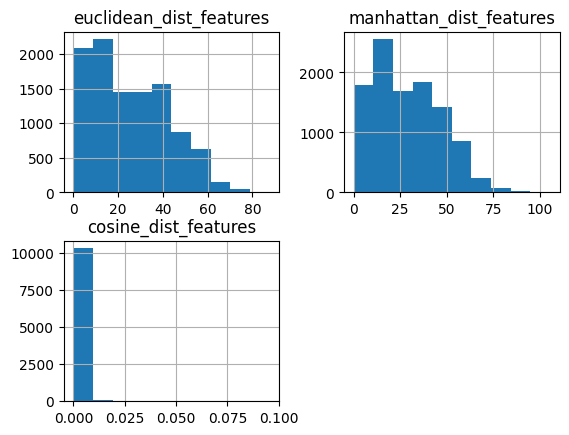

In [55]:
rec_pool_df[dist_feature_cols].hist()

## 4. Build engine and generate recommendations

 - We will output recommended tracks based on the seed track using the following recommender engine builds

    - Build 1. Audio features only
    - Build 2. Audio features and with same predicted genre
    - Build 3. Predicted genre probabilities only
    - Build 4. Audio features and predicted genre probabilities

##### 4.1. Build 1 - Use audio features only
4.1.1. Euclidean distance

In [56]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','euclidean_dist_features']]

,track_id,track_name,artist_name,euclidean_dist_features
10436,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,NaN,0.082116
10353,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,NaN,0.082116
10308,08hFNg8Oz3lvaAms7qrIif,The Day You Said Goodnight,NaN,0.082116
10391,08hFNg8Oz3lvaAms7qrIif,The Day You Said Goodnight,NaN,0.082116
2334,2ZeJRaisaFv5MpXViiQilq,Wires,Athlete,0.436951
7609,5hYKVNA29m8lOTLQOjKExN,Danser For Mig Selv,Medina,0.510595
3385,4pTiyW85otfedMPh8UJZkz,Pilit,Hilera,0.545040
7713,3x2ksaXI6EZUWidE2BiLXy,You're Still The One,Shania Twain,0.562464
8008,006oGnrSZevqZTimsD2oh4,Diva Yorgun,Melike Şahin,0.595729
382,4SwcSQIRh7M1dmzyYgCAHs,Half-Life,Duncan Sheik,0.653859


4.1.2. Manhattan distance

In [57]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','manhattan_dist_features']]

,track_id,track_name,artist_name,manhattan_dist_features
10436,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,NaN,0.129300
10308,08hFNg8Oz3lvaAms7qrIif,The Day You Said Goodnight,NaN,0.129300
10353,1Yg0Q7i9IcYweLvQMsnsEt,The Day You Said Goodnight,NaN,0.129300
10391,08hFNg8Oz3lvaAms7qrIif,The Day You Said Goodnight,NaN,0.129300
2334,2ZeJRaisaFv5MpXViiQilq,Wires,Athlete,0.942152
7713,3x2ksaXI6EZUWidE2BiLXy,You're Still The One,Shania Twain,1.082800
7609,5hYKVNA29m8lOTLQOjKExN,Danser For Mig Selv,Medina,1.090911
382,4SwcSQIRh7M1dmzyYgCAHs,Half-Life,Duncan Sheik,1.159600
3385,4pTiyW85otfedMPh8UJZkz,Pilit,Hilera,1.207820
5337,5yu0lVVW68f5VIzdjIJVQ6,Ang Wakas (feat. Trisha Macapagal),"['Arthur Miguel', 'Trisha Macapagal']",1.356819


4.1.3. Cosine distance

In [60]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_name']!=seed_track_data['track_name']].sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features']]

,track_id,track_name,artist_name,cosine_dist_features
6012,6ANHBjo3SuWuiFlC3yxa8P,Como Seria,Soraya,5.815811e-08
5110,600HVBpzF1WfBdaRwbEvLz,"Let It Go - From ""Frozen""/Soundtrack Version",Idina Menzel,6.785183e-07
9913,0luyrm1L6gjtoLekHOf67t,Masyado Pang Maaga,Ben&Ben,6.797643e-07
5683,2GAhgAjOhEmItWLfgisyOn,Low,SZA,7.028132e-07
195,3z5yZpGov3lsiFnHa4dR0f,Man on the Middle Cross,Rhett Walker,9.035289e-07
10443,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,NaN,1.347099e-06
10360,7bjkgKrE6jIBqqTfNIyaSJ,The Ballad Of,NaN,1.347099e-06
3803,5mjYQaktjmjcMKcUIcqz4s,Strangers,Kenya Grace,1.378758e-06
7083,4Ues7THP8olJMGCEOftAub,Close To Home,"['Rebecka Larsdotter', 'Ruslan Sirota', 'Tony ...",1.485347e-06
10295,4rOru0jbmXm21Lpe6bBP4r,I'll Be There,Julie Anne San Jose,1.598076e-06


## 5. Output recommendations
Pick an approach, get the track_id list, and plug in next notebook to deploy as a playlist in Spotify

In [59]:
recommendation_df['track_id'].values

array(['6ANHBjo3SuWuiFlC3yxa8P', '1Yg0Q7i9IcYweLvQMsnsEt',
       '08hFNg8Oz3lvaAms7qrIif', '08hFNg8Oz3lvaAms7qrIif',
       '1Yg0Q7i9IcYweLvQMsnsEt', '600HVBpzF1WfBdaRwbEvLz',
       '0luyrm1L6gjtoLekHOf67t', '2GAhgAjOhEmItWLfgisyOn',
       '3z5yZpGov3lsiFnHa4dR0f', '7bjkgKrE6jIBqqTfNIyaSJ'], dtype=object)